# Affine and Perspective Transformation

used for complex agumentation and transformation of images 

## Perspective Transformation

In [2]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np

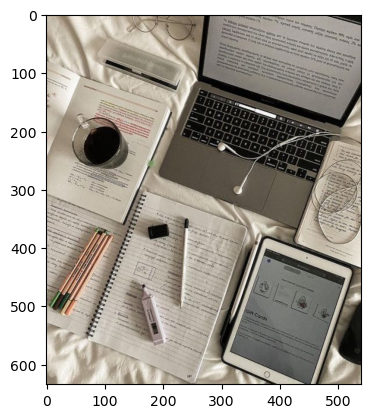

In [4]:
image = cv2.imread("../images/test_img.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)

In [7]:
rows, cols, channels = image_rgb.shape
# four points are needed for perspective transformation 
input_points = np.float32([[50,50],[cols-50,50],[50, rows-50],[cols-50, rows-50]]) # starting point , cols, 

output_points = np.float32([[10,100], [cols-100, 50], [100, rows-10], [cols-50, rows-100]])

''' Transformation matrix for perspective transformation - needs more information 
    3 x 3 matrix 
    a,b,c => responsible for horizontal scaling, rotation and translation
    d,e,f => responsible for vertical scaling, rotation and translation
    g,h,1 => (g,h) => depth, skewness for matrix  
'''

M = cv2.getPerspectiveTransform(input_points, output_points)

print(M)

[[ 1.09825678e+00  1.89085951e-01 -5.41661742e+01]
 [-1.04403601e-01  1.10806933e+00  5.18263371e+01]
 [ 2.30328523e-04  1.71596187e-04  1.00000000e+00]]


(np.float64(-0.5), np.float64(539.5), np.float64(633.5), np.float64(-0.5))

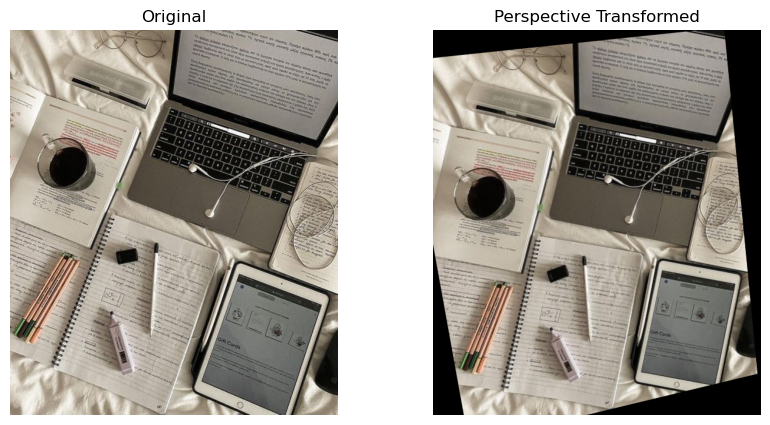

In [11]:
perspective_img = cv2.warpPerspective(image_rgb, M, (cols, rows)) # image, transforamtion matrix, width (rows), height(cols) 

plt.figure(figsize= (10,5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(perspective_img)
plt.title("Perspective Transformed")
plt.axis('off')

## Affine Transformation

need three points for this information

(np.float64(-0.5), np.float64(539.5), np.float64(633.5), np.float64(-0.5))

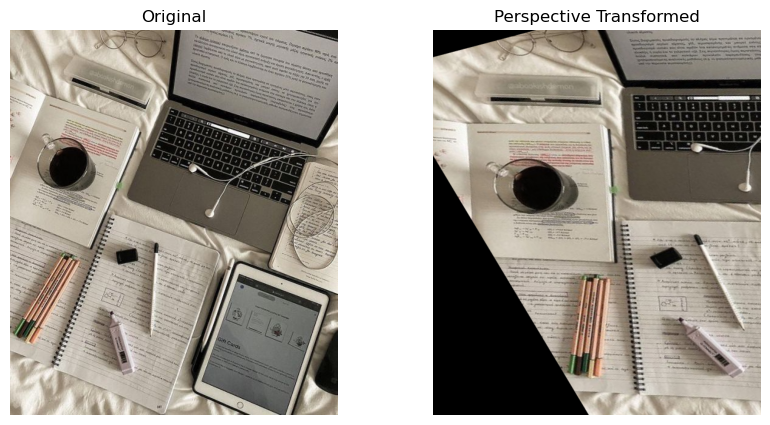

In [ ]:

input_points = np.float32([[50,50],[200,50], [50,200]])
# where the input points must map to output image 
output_points = np.float32([[10,100],[200,50], [100,250]])

M = cv2.getAffineTransform(input_points, output_points)

affine_img = cv2.warpAffine(image_rgb, M, (cols, rows))


plt.figure(figsize= (10,5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(affine_img)
plt.title("Perspective Transformed")
plt.axis('off')

## Rotation

(np.float64(-0.5), np.float64(539.5), np.float64(633.5), np.float64(-0.5))

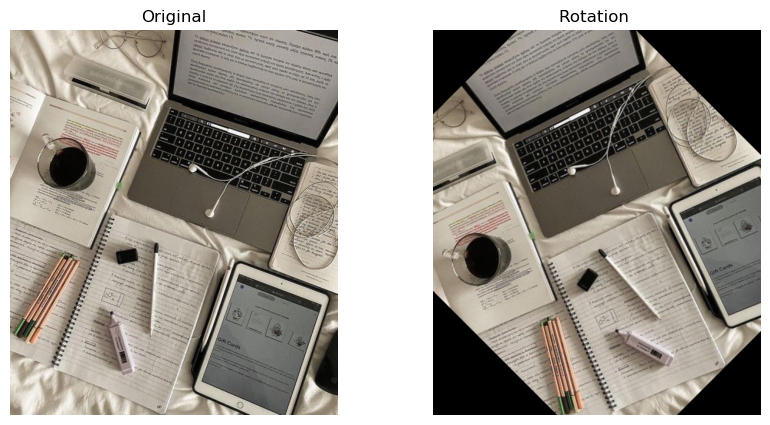

In [14]:
angle = 45
center = (cols//2), (rows//2) # gives the center of image 

# creating own tansformation matrix
scale = 1.0

M = cv2.getRotationMatrix2D(center, angle, scale) 

rotated_img = cv2.warpAffine(image_rgb, M, (cols,rows))

plt.figure(figsize= (10,5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rotated_img)
plt.title("Rotation ")
plt.axis('off')

## Shearing

(np.float64(-0.5), np.float64(856.5), np.float64(633.5), np.float64(-0.5))

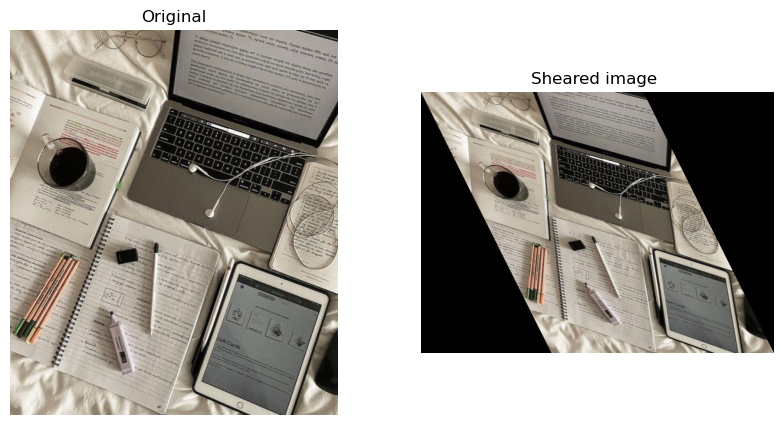

In [ ]:

shear_x , shear_y = 0.5,0
M = np.float32([[1, shear_x,0],
           [shear_y, 1, 0]])

sheared_img = cv2.warpAffine(image_rgb, M, (cols+int(shear_x*rows),rows)) # changing to new width, col, cols*2

plt.figure(figsize= (10,5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sheared_img)
plt.title("Sheared image ")
plt.axis('off')

## Translation

(np.float64(-0.5), np.float64(539.5), np.float64(633.5), np.float64(-0.5))

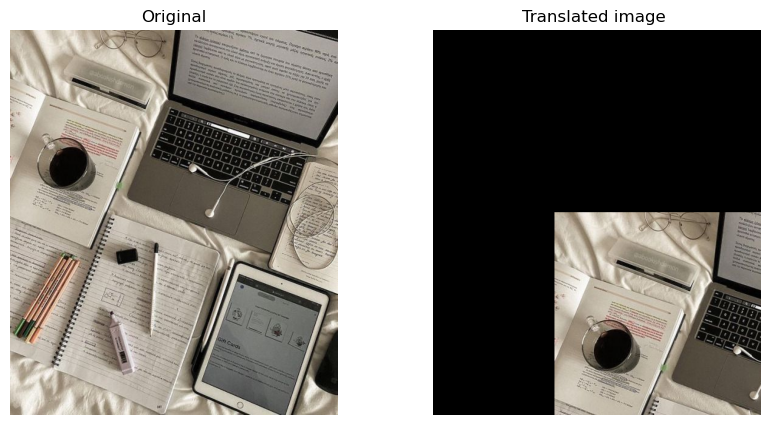

In [ ]:

tx, ty = 200, 300 # shifted 200 pixels in x direction and 300 px in y axes 
M = np.float32([[1, 0, tx],
           [0, 1, ty]])

translated_img = cv2.warpAffine(image_rgb, M, (cols,rows)) # changing to new width, col, cols*2

plt.figure(figsize= (10,5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(translated_img)
plt.title("Translated image ")
plt.axis('off')

## Summary

Affine vs Perspective:
A - 3 ; P - 4 points 
A - parallel lines remains ; P - converge ; straight lines remain same 
A - Scaling, Rotation, Shearing, Translation ; P - Perspective transformation to change the view 